# Support Vector Machines (SVM)

## 1. Импорты

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report)


import warnings
warnings.filterwarnings('ignore')

## 2. Загрузка данных - adult salary

In [57]:
columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]

df = pd.read_csv('datasets/adult.data', header=None, names=columns)
print(f"Размер данных: {df.shape}")
df.head()

Размер данных: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [60]:
df["income"] = df["income"].str.strip()
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

In [61]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [62]:
df["workclass"]= df["workclass"].str.strip().replace("?", "Unknown")

In [63]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [64]:
to_remove = ['Never-worked', 'Without-pay']
df = df[~df['workclass'].isin(to_remove)]

In [65]:
df= df[~df["education"].isin(df["education"].value_counts()[df["education"].value_counts()<200].index)] 
df= df[~df["marital_status"].isin(df["marital_status"].value_counts()[df["marital_status"].value_counts()<200].index)] 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32298 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32298 non-null  int64 
 1   workclass       32298 non-null  object
 2   fnlwgt          32298 non-null  int64 
 3   education       32298 non-null  object
 4   education_num   32298 non-null  int64 
 5   marital_status  32298 non-null  object
 6   occupation      32298 non-null  object
 7   relationship    32298 non-null  object
 8   race            32298 non-null  object
 9   sex             32298 non-null  object
 10  capital_gain    32298 non-null  int64 
 11  capital_loss    32298 non-null  int64 
 12  hours_per_week  32298 non-null  int64 
 13  native_country  32298 non-null  object
 14  income          32298 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.9+ MB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

X = df.drop('income', axis=1)
y = df['income']

X = preprocess.fit_transform(X)

## 3. Подготовка данных

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]} примеров")
print(f"Test:  {X_test.shape[0]} примеров")

Train: 25838 примеров
Test:  6460 примеров


## 4. SVM без масштабирования 

In [ ]:
svm_no_scale = SVC(kernel='rbf', random_state=42)
svm_no_scale.fit(X_train, y_train)

train_acc = accuracy_score(y_train, svm_no_scale.predict(X_train))
test_acc = accuracy_score(y_test, svm_no_scale.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

Train Accuracy (БЕЗ масштабирования): 0.7931
Test Accuracy (БЕЗ масштабирования):  0.7966


## 5. SVM с масштабированием 

In [ ]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Размерность после масштабирования: (25838, 103)


In [83]:
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)

train_acc = accuracy_score(y_train, svm_scaled.predict(X_train_scaled))
test_acc = accuracy_score(y_test, svm_scaled.predict(X_test_scaled))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"\nКоличество Support Vectors: {svm_scaled.n_support_.sum()}")

Train Accuracy: 0.8594
Test Accuracy:  0.8515

Количество Support Vectors: 9749


## 6. Сравнение Linear vs RBF kernel

In [84]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

results = {
    'Kernel': ['Linear', 'RBF'],
    'Train Accuracy': [
        accuracy_score(y_train, svm_linear.predict(X_train_scaled)),
        accuracy_score(y_train, svm_rbf.predict(X_train_scaled))
    ],
    'Test Accuracy': [
        accuracy_score(y_test, svm_linear.predict(X_test_scaled)),
        accuracy_score(y_test, svm_rbf.predict(X_test_scaled))
    ],
    'Support Vectors': [
        svm_linear.n_support_.sum(),
        svm_rbf.n_support_.sum()
    ]
}

pd.DataFrame(results)

,Kernel,Train Accuracy,Test Accuracy,Support Vectors
0,Linear,0.851033,0.855108,8991
1,RBF,0.859432,0.851548,9749


## 7. Влияние параметра C

In [85]:
C_values = [0.01, 0.1, 1, 10, 100]
results_c = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    train_acc = accuracy_score(y_train, svm.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
    n_sv = svm.n_support_.sum()
    
    results_c.append({
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Support Vectors': n_sv
    })

df_c = pd.DataFrame(results_c)
print(df_c)

        C  Train Accuracy  Test Accuracy  Support Vectors
0    0.01        0.799094       0.804025            12673
1    0.10        0.838378       0.845666            10683
2    1.00        0.859432       0.851548             9749
3   10.00        0.877119       0.849536             9317
4  100.00        0.896161       0.844118             9224


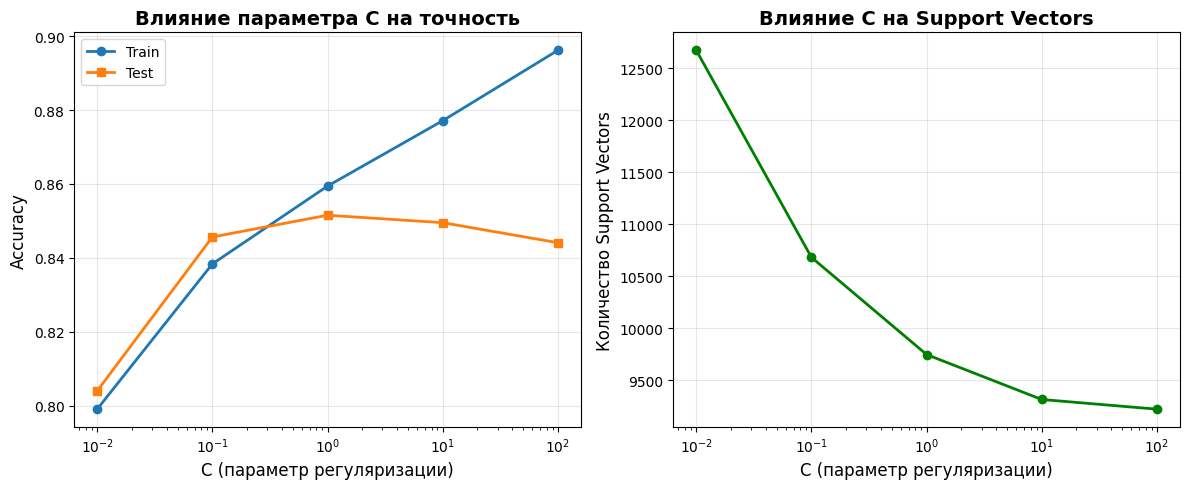

In [86]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_c['C'], df_c['Train Accuracy'], marker='o', label='Train', linewidth=2)
plt.plot(df_c['C'], df_c['Test Accuracy'], marker='s', label='Test', linewidth=2)
plt.xscale('log')
plt.xlabel('C (параметр регуляризации)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Влияние параметра C на точность', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df_c['C'], df_c['Support Vectors'], marker='o', color='green', linewidth=2)
plt.xscale('log')
plt.xlabel('C (параметр регуляризации)', fontsize=12)
plt.ylabel('Количество Support Vectors', fontsize=12)
plt.title('Влияние C на Support Vectors', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Влияние параметра gamma (для RBF kernel)

In [87]:
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
results_gamma = []

for gamma in gamma_values:
    svm = SVC(kernel='rbf', C=1, gamma=gamma, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    train_acc = accuracy_score(y_train, svm.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
    n_sv = svm.n_support_.sum()
    
    results_gamma.append({
        'gamma': gamma,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Support Vectors': n_sv
    })

df_gamma = pd.DataFrame(results_gamma)
print(df_gamma)

     gamma  Train Accuracy  Test Accuracy  Support Vectors
0   0.0001        0.834159       0.842570            11503
1   0.0010        0.847511       0.852167             9884
2   0.0100        0.863031       0.849690             9931
3   0.1000        0.893452       0.830650            16094
4   1.0000        0.937186       0.806656            21336
5  10.0000        0.978791       0.774149            24993


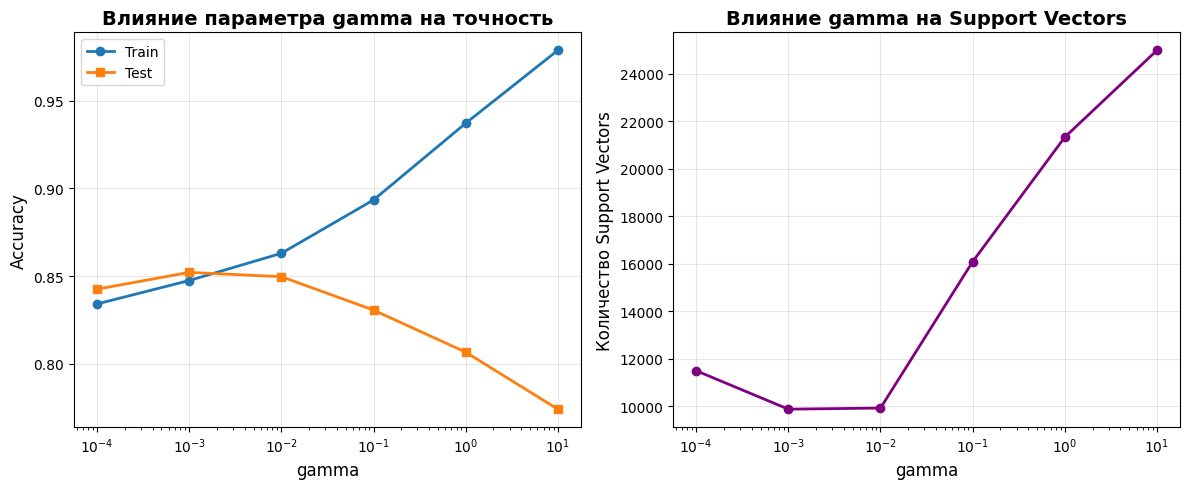

In [88]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_gamma['gamma'], df_gamma['Train Accuracy'], marker='o', label='Train', linewidth=2)
plt.plot(df_gamma['gamma'], df_gamma['Test Accuracy'], marker='s', label='Test', linewidth=2)
plt.xscale('log')
plt.xlabel('gamma', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Влияние параметра gamma на точность', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df_gamma['gamma'], df_gamma['Support Vectors'], marker='o', color='purple', linewidth=2)
plt.xscale('log')
plt.xlabel('gamma', fontsize=12)
plt.ylabel('Количество Support Vectors', fontsize=12)
plt.title('Влияние gamma на Support Vectors', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. GridSearchCV - подбор лучших параметров

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Лучшие параметры: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Лучшая accuracy: 0.8497


In [90]:
best_svm = grid_search.best_estimator_

y_pred_train = best_svm.predict(X_train_scaled)
y_pred_test = best_svm.predict(X_test_scaled)

print(f"Train Accuracy (лучшая модель): {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy (лучшая модель):  {accuracy_score(y_test, y_pred_test):.4f}")
print(f"\nSupport Vectors: {best_svm.n_support_.sum()}")

Train Accuracy (лучшая модель): 0.8506
Test Accuracy (лучшая модель):  0.8551

Support Vectors: 8985


## 10. Метрики и Confusion Matrix

In [91]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=['<=50K', '>50K']))

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4910
        >50K       0.75      0.60      0.66      1550

    accuracy                           0.86      6460
   macro avg       0.81      0.77      0.79      6460
weighted avg       0.85      0.86      0.85      6460



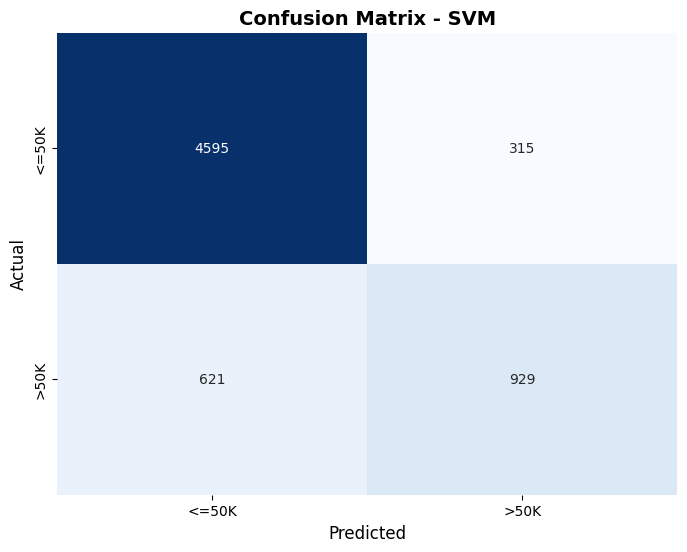

In [92]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - SVM', fontsize=14, fontweight='bold')
plt.show()

## 11. Вероятностные предсказания (probability=True)

In [95]:
svm_proba = SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42)
svm_proba.fit(X_train_scaled, y_train)

y_proba = svm_proba.predict_proba(X_test_scaled)

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': svm_proba.predict(X_test_scaled),
    'Prob_<=50K': y_proba[:, 0],
    'Prob_>50K': y_proba[:, 1]
})

print(results_df.head(10))

   Actual  Predicted  Prob_<=50K  Prob_>50K
0       0          0    0.861278   0.138722
1       1          1    0.554350   0.445650
2       0          0    0.789123   0.210877
3       0          0    0.976582   0.023418
4       0          0    0.880085   0.119915
5       0          0    0.820250   0.179750
6       0          0    0.891421   0.108579
7       1          1    0.003368   0.996632
8       0          0    0.918869   0.081131
9       0          0    0.966318   0.033682
